In [1]:
%pip install -U openpyxl
%pip install -U seaborn


[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd

# df = pd.read_csv("new_data_fill_missing_with_previous_row.csv")
df = pd.read_excel("data/ODI-2023.xlsx")
df = df.drop(["Tijdstempel"], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 16 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   What programme are you in?                                         305 non-null    object
 1   Have you taken a course on machine learning?                       305 non-null    object
 2   Have you taken a course on information retrieval?                  305 non-null    object
 3   Have you taken a course on statistics?                             305 non-null    object
 4   Have you taken a course on databases?                              305 non-null    object
 5   What is your gender?                                               305 non-null    object
 6   I have used ChatGPT to help me with some of my study assignments   305 non-null    object
 7   When is your birthday (date)?      

In [3]:
import json

def calculate_statistics_numerical(df, col_names):
    stats = {}
    for name in col_names:
        col = df[name]
        col = pd.to_numeric(col, errors='coerce').dropna()
        col_stats = {}
        col_stats["length"] = len(col)
        col_stats["mean"] = col.mean()
        col_stats["median"] = col.median()
        col_stats["mode"] = col.value_counts().idxmax()
        col_stats["max"] = col.max()
        col_stats["min"] = col.min()
        col_stats["range"] = col.max() - col.min()
        col_stats["std"] = col.std()
        col_stats["num_miss_vals"] = len(df[df[name] == 'unknown'])
        stats[name] = col_stats
    return stats

numerical_stats = calculate_statistics_numerical(df, [
    "How many students do you estimate there are in the room?",
    "What is your stress level (0-100)?",
    "How many hours per week do you do sports (in whole hours)? ",
    "Give a random number"
])

numerical_stats["How many students do you estimate there are in the room?"]["num_incorrect_vals"] = 1
numerical_stats["What is your stress level (0-100)?"]["num_incorrect_vals"] = 9
numerical_stats["How many hours per week do you do sports (in whole hours)? "]["num_incorrect_vals"] = 14
numerical_stats["Give a random number"]["num_incorrect_vals"] = 5

print(json.dumps(numerical_stats, indent=3))

{
   "How many students do you estimate there are in the room?": {
      "length": 299,
      "mean": 334.33946488294316,
      "median": 350.0,
      "mode": 400.0,
      "max": 900.0,
      "min": -6382.0,
      "range": 7282.0,
      "std": 414.1803290202997,
      "num_miss_vals": 0,
      "num_incorrect_vals": 1
   },
   "What is your stress level (0-100)?": {
      "length": 296,
      "mean": 341182665.67195946,
      "median": 50.0,
      "mode": 70.0,
      "max": 100000000000.0,
      "min": -420.0,
      "range": 100000000420.0,
      "std": 5812471698.9414,
      "num_miss_vals": 0,
      "num_incorrect_vals": 9
   },
   "How many hours per week do you do sports (in whole hours)? ": {
      "length": 291,
      "mean": 5.888350515463918,
      "median": 4.0,
      "mode": 4.0,
      "max": 290.0,
      "min": -10.0,
      "range": 300.0,
      "std": 17.112508291552103,
      "num_miss_vals": 0,
      "num_incorrect_vals": 14
   },
   "Give a random number": {
      "length

In [4]:
def calculate_statistics_categorical(df, col_names):
    stats = {}
    for name in col_names:
        col = df[name]
        col_stats = {}
        col_stats["length"] = len(col)
        col_stats["mode"] = col.value_counts().idxmax()
        col_stats["num_miss_vals"] = len(df[df[name] == 'unknown'])
        stats[name] = col_stats
    return stats

categorical_stats = calculate_statistics_categorical(df, [
    "What programme are you in?",
    "Have you taken a course on machine learning?",
    "Have you taken a course on information retrieval?",
    "Have you taken a course on statistics?",
    "Have you taken a course on databases?",
    "What is your gender?",
    "I have used ChatGPT to help me with some of my study assignments ",
    "When is your birthday (date)?",
    "Did you stand up to come to your previous answer    ?",
    "Time you went to bed Yesterday",
    "What makes a good day for you (1)?",
    "What makes a good day for you (2)?"
])

categorical_stats["What programme are you in?"]["num_incorrect_vals"] = 0
categorical_stats["Have you taken a course on machine learning?"]["num_incorrect_vals"] = 0
categorical_stats["Have you taken a course on information retrieval?"]["num_incorrect_vals"] = 0
categorical_stats["Have you taken a course on statistics?"]["num_incorrect_vals"] = 53
categorical_stats["Have you taken a course on databases?"]["num_incorrect_vals"] = 1
categorical_stats["What is your gender?"]["num_incorrect_vals"] = 0
categorical_stats["I have used ChatGPT to help me with some of my study assignments "]["num_incorrect_vals"] = 0
categorical_stats["Did you stand up to come to your previous answer    ?"]["num_incorrect_vals"] = 0

print(json.dumps(categorical_stats, indent=3))

{
   "What programme are you in?": {
      "length": 305,
      "mode": "AI",
      "num_miss_vals": 0,
      "num_incorrect_vals": 0
   },
   "Have you taken a course on machine learning?": {
      "length": 305,
      "mode": "yes",
      "num_miss_vals": 3,
      "num_incorrect_vals": 0
   },
   "Have you taken a course on information retrieval?": {
      "length": 305,
      "mode": 0,
      "num_miss_vals": 23,
      "num_incorrect_vals": 0
   },
   "Have you taken a course on statistics?": {
      "length": 305,
      "mode": "mu",
      "num_miss_vals": 16,
      "num_incorrect_vals": 53
   },
   "Have you taken a course on databases?": {
      "length": 305,
      "mode": "ja",
      "num_miss_vals": 1,
      "num_incorrect_vals": 1
   },
   "What is your gender?": {
      "length": 305,
      "mode": "male",
      "num_miss_vals": 0,
      "num_incorrect_vals": 0
   },
   "I have used ChatGPT to help me with some of my study assignments ": {
      "length": 305,
      "mode": 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 304
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   students_in_room  297 non-null    float64
 1   stress_level      297 non-null    float64
 2   sports_per_week   297 non-null    float64
 3   random_number     297 non-null    float64
dtypes: float64(4)
memory usage: 11.6 KB
None
0       1.0
1      69.0
2      42.0
3      17.0
4      12.0
       ... 
300    67.0
301    13.0
302    18.0
303    69.0
304    10.0
Name: random_number, Length: 297, dtype: float64


C:\Users\koenk\AppData\Local\Temp\ipykernel_29588\657032350.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['random_number'] = df['random_number'].str.replace(r'[^0-9]+', '')
C:\Users\koenk\AppData\Local\Temp\ipykernel_29588\657032350.py:16: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdYlGn").copy()
  color.set_bad('lightblue')    # if the value is bad the color would be lightblue instead of white


<AxesSubplot:>

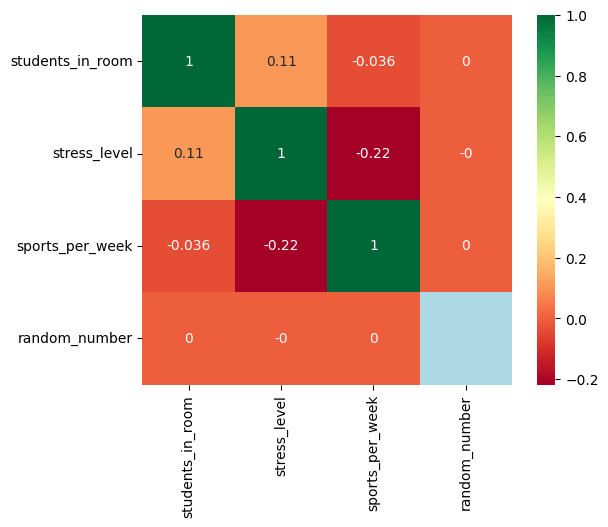

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("new_data_fill_missing_with_previous_row.csv")
df = df[["students_in_room", "stress_level", "sports_per_week", "random_number"]]
df['random_number'] = df['random_number'].str.replace(r'[^0-9]+', '')
df['random_number'].replace('', np.nan, inplace=True)
df.dropna(inplace=True)
df["random_number"] = df["random_number"].astype(float)
print(df.info())

print(df["random_number"])

correlation = df.corr()
color = plt.get_cmap('RdYlGn')   # default color
color.set_bad('lightblue')    # if the value is bad the color would be lightblue instead of white
# h_map = sns.heatmap(data=cor_mat, annot=True, cmap=color) 
# plt.figure(figsize=(18, 18))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap=color)